In [41]:
symbol= input("Enter Stock Symbol whose upcoming week's stocks you want to predict: ")
import time, datetime
tm =datetime.datetime.today().strftime('%Y-%m-%d')

Enter Stock Symbol whose upcoming week's stocks you want to predict: TCS.NS


In [42]:
#all import for the projects
import pandas_datareader.data as wb
web_df1 = wb.DataReader(symbol, 'yahoo', '2005-01-01', tm)
web_df1.to_csv('aapl', sep='\t', encoding='utf-8')


In [43]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
   
    numerical = ['High', 'Low','Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

def get_denormalized_data(data):
    scaler.fit(data)
    numerical = ['Close']
    data[numerical] = scaler.inverse_transform(data[numerical])
    return data

def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []
    high = []
    low = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        high.append(data['High'][i])
        low.append(data['Low'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)
    stocks['High']=pd.to_numeric(high)
    stocks['Low'] = pd.to_numeric(low)
    # return new formatted data
    return stocks

In [44]:
stocks = remove_data(web_df1)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail(1))

   Item         Open        Close     Volume         High          Low
0     0  2110.000000  2157.850098  2890500.0  2165.000000  2108.500000
1     1  2185.000000  2132.000000  3780886.0  2186.050049  2125.000000
2     2  2255.000000  2215.399902  2457699.0  2259.399902  2211.100098
3     3  2238.550049  2260.350098  3488395.0  2266.949951  2230.100098
4     4  2203.000000  2238.550049  2716958.0  2243.949951  2193.149902
---
      Item        Open       Close     Volume        High         Low
3528  3528  166.250000  167.494995  7623136.0  168.125000  164.082993
3529  3529  165.000000  165.057007  8006888.0  168.250000  161.561996
3530  3530  167.524994  165.625000  9604320.0  167.524994  160.037994
3531  3531  168.750000  167.658005  4979104.0  169.250000  166.645004
3532  3532  166.932007  169.158005  4734168.0  169.587006  166.932007


In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)


def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basic(stocks, title='Google Trading', y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()


def plot_prediction(actual, prediction, train, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')
    plt.plot(train,"#eeefff", label='Training Data')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

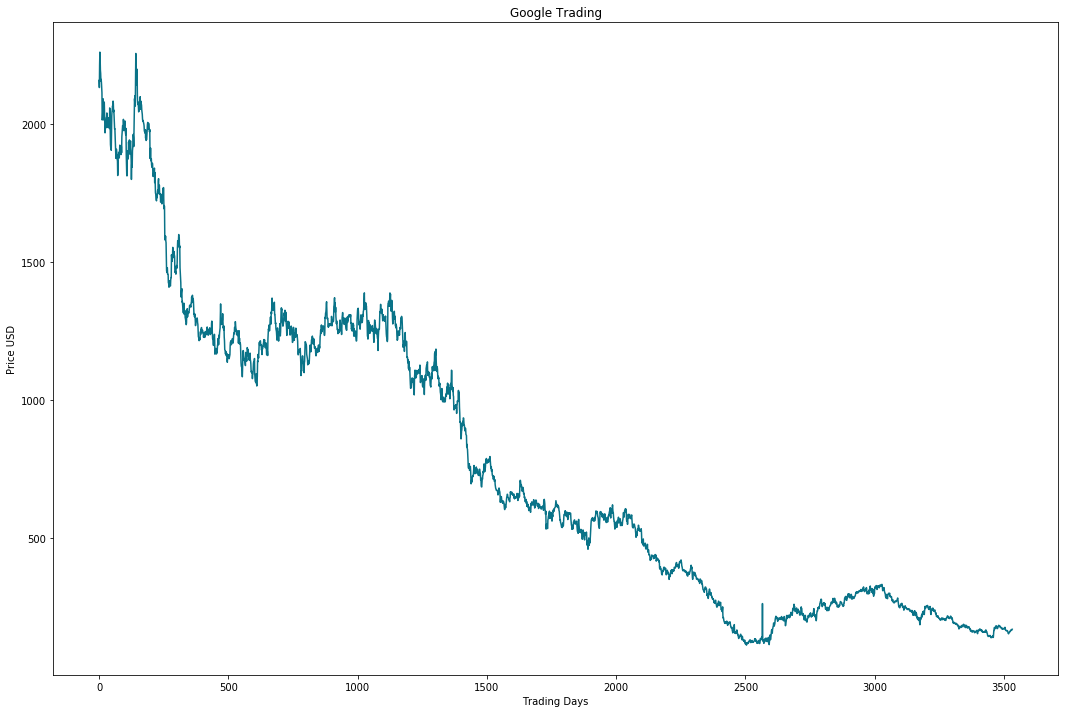

In [46]:
plot_basic(stocks)

In [47]:
import numpy as np

stocks = get_normalised_data(stocks)
print(stocks)

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))
print("High --- mean :", np.mean(stocks['High']),"  \t Std: ", np.std(stocks['High']),"  \t Max: ", np.max(stocks['High']),"  \t Min: ", np.min(stocks['High']))
print("Low --- mean :", np.mean(stocks['Low']),"  \t Std: ", np.std(stocks['Low']),"  \t Max: ", np.max(stocks['Low']),"  \t Min: ", np.min(stocks['Low']))

      Item      Open     Close    Volume      High       Low
0        0  0.932338  0.952299  0.032822  0.948630  0.942810
1        1  0.967336  0.940269  0.042932  0.958377  0.950570
2        2  1.000000  0.979081  0.027907  0.992337  0.991064
3        3  0.992324  1.000000  0.039611  0.995833  1.000000
4        4  0.975735  0.989855  0.030851  0.985184  0.982622
5        5  0.962669  0.969588  0.047822  0.967150  0.970817
6        6  0.954736  0.964213  0.034100  0.962520  0.965197
7        7  0.957070  0.950996  0.024567  0.948862  0.954827
8        8  0.950070  0.953974  0.022791  0.953723  0.960259
9        9  0.950957  0.948669  0.038763  0.944000  0.945491
10      10  0.937004  0.940176  0.065540  0.944440  0.946126
11      11  0.913672  0.931566  0.104343  0.927703  0.911065
12      12  0.898740  0.885587  0.036319  0.890293  0.895074
13      13  0.902007  0.887914  0.038862  0.897701  0.898202
14      14  0.919739  0.897571  0.037620  0.911822  0.908713
15      15  0.913672  0.

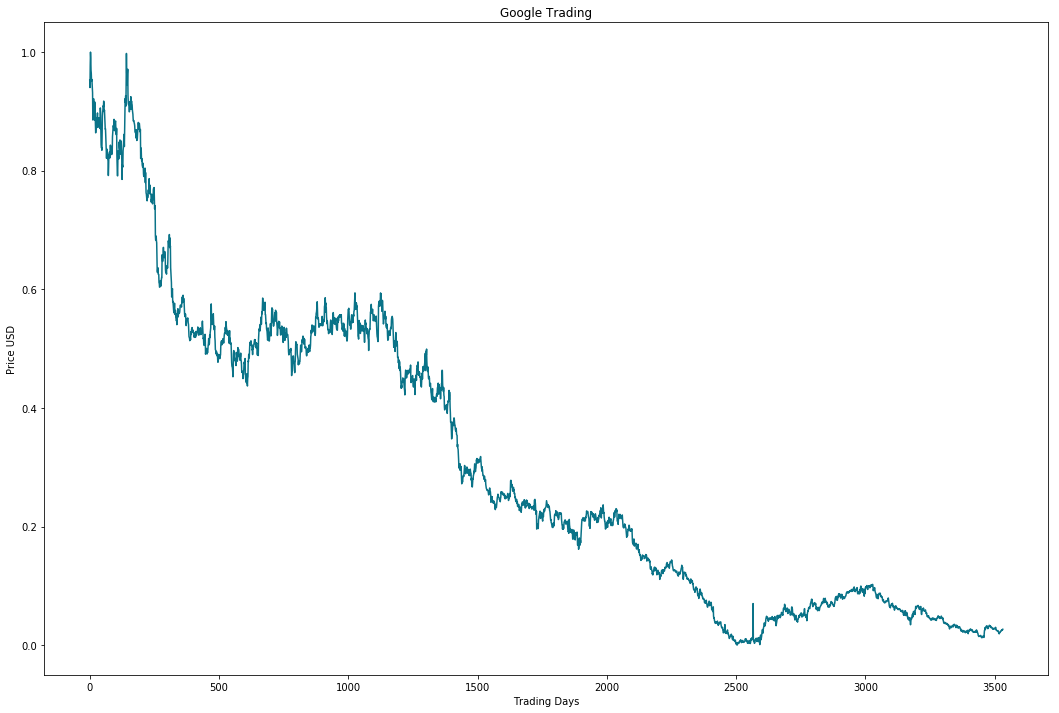

In [48]:
plot_basic(stocks)

In [49]:
import math
import pandas as pd
import numpy as np

from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import  time #helper libraries

In [50]:
import numpy as np
import math


def scale_range(x, input_range, target_range):
    """

    Rescale a numpy array from input to target range
    :param x: data to scale
    :param input_range: optional input range for data: default 0.0:1.0
    :param target_range: optional target range for data: default 0.0:1.0
    :return: rescaled array, incoming range [min,max]
    """

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range


    # Divides stock market data intp test and train data set which will generate confusion matrix for the better undestandingdef train_test_split_linear_regression(stocks):
    """
        Split the data set into training and testing feature for Linear Regression Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
        :return: label_range: scaled range of label used in predicting price,
    """
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    for index, row in stocks.iterrows():
        # print([np.array(row['Item'])])
        feature.append([(row['Item'])])
        label.append([(row['Close'])])

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .315
    split = int(math.floor(len(stocks['Item']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range


def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
        Split the data set into training and testing feature for Long Short Term Memory Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :param prediction_time: no of days
        :param test_data_size: size of test data to be used
        :param unroll_length: how long a window should be used for train test split
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
    """
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

In [51]:
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume,High,Low
0,0.932338,0.952299,0.032822,0.948630,0.942810
1,0.967336,0.940269,0.042932,0.958377,0.950570
2,1.000000,0.979081,0.027907,0.992337,0.991064
3,0.992324,1.000000,0.039611,0.995833,1.000000
4,0.975735,0.989855,0.030851,0.985184,0.982622


In [52]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print(y_train)

x_train (2977, 50, 5)
y_train (2977,)
x_test (446, 50, 5)
y_test (446,)
[0.91364946 0.89957184 0.90222446 ... 0.10212071 0.09673445 0.09181869]


C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [53]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


In [54]:
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.05825495719909668


In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2828 samples, validate on 149 samples
Epoch 1/1
2828/2828 [==============================] - 18s 6ms/step - loss: 0.0069 - val_loss: 2.8608e-05


In [56]:
predictions = model.predict(X_test)

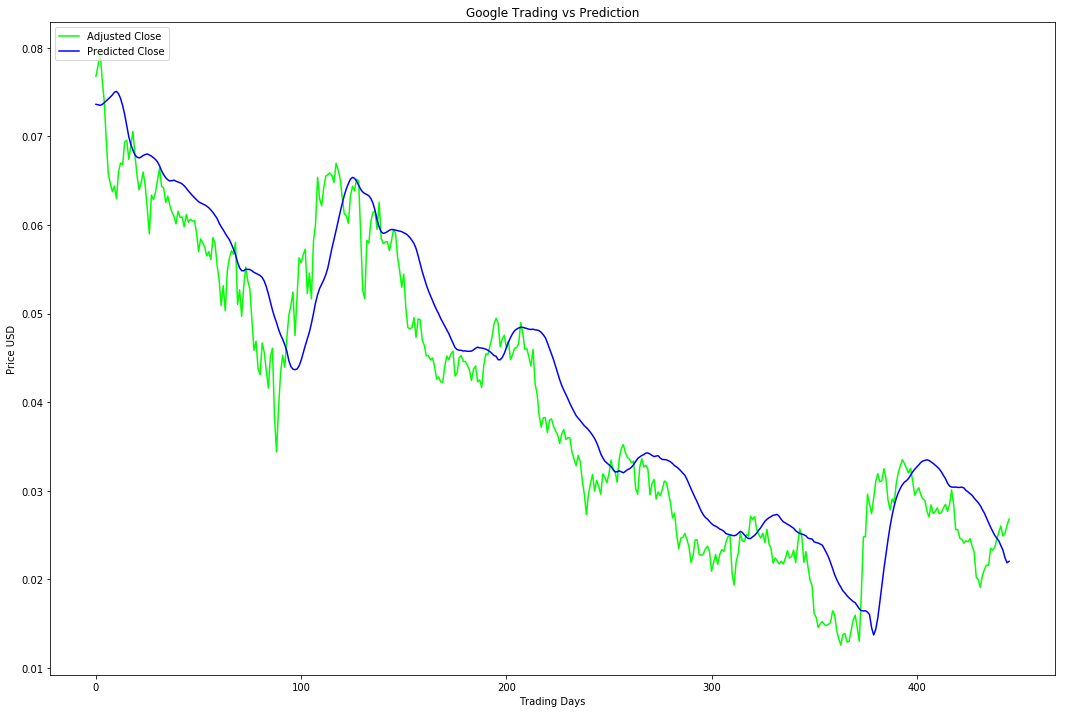

In [57]:
plot_lstm_prediction(y_test,predictions)

In [58]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00040623 MSE (0.02015515 RMSE)
Test Score: 0.00003143 MSE (0.00560581 RMSE)


In [59]:
batch_size = 100
epochs = 10

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.06032156944274902


In [60]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2828 samples, validate on 149 samples
Epoch 1/10
 - 12s - loss: 0.0212 - val_loss: 0.0011
Epoch 2/10
 - 5s - loss: 0.0021 - val_loss: 5.7470e-05
Epoch 3/10
 - 5s - loss: 0.0015 - val_loss: 2.2882e-05
Epoch 4/10
 - 5s - loss: 0.0014 - val_loss: 1.6364e-05
Epoch 5/10
 - 5s - loss: 0.0014 - val_loss: 2.5489e-05
Epoch 6/10
 - 5s - loss: 0.0013 - val_loss: 1.6362e-05
Epoch 7/10
 - 5s - loss: 0.0012 - val_loss: 1.6921e-05
Epoch 8/10
 - 5s - loss: 0.0012 - val_loss: 1.6767e-05
Epoch 9/10
 - 5s - loss: 0.0011 - val_loss: 1.7709e-05
Epoch 10/10
 - 6s - loss: 0.0010 - val_loss: 2.8720e-05


In [32]:
import pandas as pd
pred = pd.DataFrame(predictions)
print(pred)

            0
0    0.032668
1    0.032723
2    0.032777
3    0.033236
4    0.033601
5    0.033800
6    0.034137
7    0.034546
8    0.034612
9    0.034555
10   0.033848
11   0.033637
12   0.033144
13   0.032028
14   0.030859
15   0.030443
16   0.030602
17   0.030819
18   0.030968
19   0.031045
20   0.030952
21   0.030665
22   0.030335
23   0.030030
24   0.029794
25   0.029444
26   0.029136
27   0.028923
28   0.028751
29   0.028686
..        ...
416  0.012381
417  0.013127
418  0.013722
419  0.013954
420  0.013871
421  0.013372
422  0.013124
423  0.012953
424  0.012534
425  0.012253
426  0.011749
427  0.011627
428  0.011534
429  0.011381
430  0.011523
431  0.011679
432  0.011760
433  0.011763
434  0.011685
435  0.011553
436  0.011181
437  0.010972
438  0.010871
439  0.010731
440  0.010670
441  0.010586
442  0.010573
443  0.010559
444  0.010510
445  0.010419

[446 rows x 1 columns]


In [33]:
print(pred)

            0
0    0.032668
1    0.032723
2    0.032777
3    0.033236
4    0.033601
5    0.033800
6    0.034137
7    0.034546
8    0.034612
9    0.034555
10   0.033848
11   0.033637
12   0.033144
13   0.032028
14   0.030859
15   0.030443
16   0.030602
17   0.030819
18   0.030968
19   0.031045
20   0.030952
21   0.030665
22   0.030335
23   0.030030
24   0.029794
25   0.029444
26   0.029136
27   0.028923
28   0.028751
29   0.028686
..        ...
416  0.012381
417  0.013127
418  0.013722
419  0.013954
420  0.013871
421  0.013372
422  0.013124
423  0.012953
424  0.012534
425  0.012253
426  0.011749
427  0.011627
428  0.011534
429  0.011381
430  0.011523
431  0.011679
432  0.011760
433  0.011763
434  0.011685
435  0.011553
436  0.011181
437  0.010972
438  0.010871
439  0.010731
440  0.010670
441  0.010586
442  0.010573
443  0.010559
444  0.010510
445  0.010419

[446 rows x 1 columns]


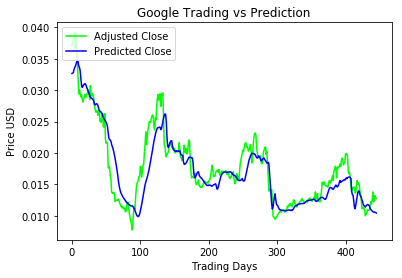

In [34]:
plot_lstm_prediction(y_test,predictions)

In [61]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00046108 MSE (0.02147277 RMSE)
Test Score: 0.00004027 MSE (0.00634571 RMSE)


In [62]:
print(predictions)

[[0.07362735]
 [0.07358591]
 [0.07351393]
 [0.07361057]
 [0.07379843]
 [0.07401539]
 [0.07422779]
 [0.07445521]
 [0.07469144]
 [0.07499758]
 [0.07508983]
 [0.07482008]
 [0.07427873]
 [0.07348017]
 [0.07246713]
 [0.07124648]
 [0.06996625]
 [0.06907795]
 [0.06845968]
 [0.06791167]
 [0.06766653]
 [0.06757312]
 [0.06767847]
 [0.06785751]
 [0.06796146]
 [0.06802317]
 [0.06791332]
 [0.06778439]
 [0.06760275]
 [0.06740502]
 [0.06712338]
 [0.06667728]
 [0.0660992 ]
 [0.06568894]
 [0.06534052]
 [0.06510457]
 [0.06498102]
 [0.06500652]
 [0.06507123]
 [0.06494645]
 [0.06485727]
 [0.06477182]
 [0.06464184]
 [0.06443372]
 [0.06416169]
 [0.06386108]
 [0.06359428]
 [0.06333152]
 [0.06309178]
 [0.06286088]
 [0.06263768]
 [0.06249783]
 [0.06238938]
 [0.06227284]
 [0.06213168]
 [0.06195174]
 [0.06169856]
 [0.06142451]
 [0.0611021 ]
 [0.06075945]
 [0.06023226]
 [0.05982002]
 [0.05946734]
 [0.05905996]
 [0.05869109]
 [0.05835875]
 [0.05784219]
 [0.05729019]
 [0.05665814]
 [0.05580403]
 [0.05516476]
 [0.05

In [63]:
import numpy as np
predictions = predictions.reshape(1,446)

In [64]:
predictions = predictions[0][1:]
print(predictions.shape)

(445,)


In [65]:
predictions = predictions.reshape(89,5)

In [66]:
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)

(89, 5)


In [67]:
print(predictions[25][0])

257.10275
